# Data Visualisation of Covid19 India Dataset : (sd.19cs1101@phd.nitdgp.ac.in)


In [0]:
covid_india = pd.read_csv('covid_19_india.csv')
covid_india.shape

(1286, 9)

In [0]:
covid_india.head(5)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [0]:
covid_india.tail(5)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
1281,1282,24/04/20,5:00 PM,Telengana,-,-,253,26,984
1282,1283,24/04/20,5:00 PM,Tripura,-,-,1,0,2
1283,1284,24/04/20,5:00 PM,Uttarakhand,-,-,24,0,47
1284,1285,24/04/20,5:00 PM,Uttar Pradesh,-,-,206,24,1604
1285,1286,24/04/20,5:00 PM,West Bengal,-,-,103,15,514


In [0]:
covid_india = covid_india.set_index('Date')
covid_india.head(5)

,Sno,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
Date,,,,,,,,
30/01/20,1,6:00 PM,Kerala,1,0,0,0,1
31/01/20,2,6:00 PM,Kerala,1,0,0,0,1
01/02/20,3,6:00 PM,Kerala,2,0,0,0,2
02/02/20,4,6:00 PM,Kerala,3,0,0,0,3
03/02/20,5,6:00 PM,Kerala,3,0,0,0,3


In [0]:
import matplotlib.pyplot as plt

In [0]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
sns.set(rc={'figure.figsize':(15, 8)})

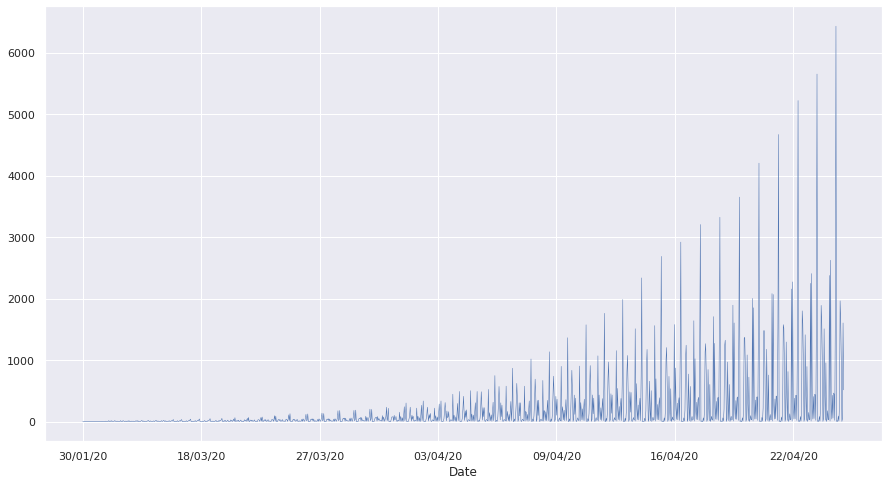

In [0]:
covid_india['Confirmed'].plot(linewidth=0.5,alpha=1);

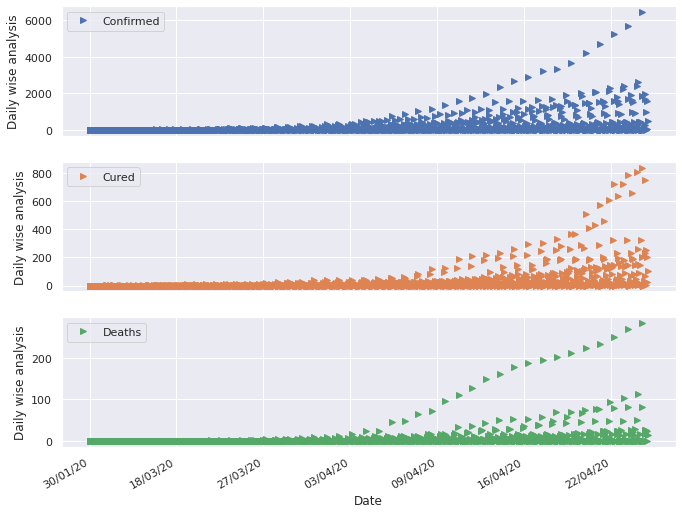

In [0]:
cols_plot = ['Confirmed', 'Cured', 'Deaths']
axes = covid_india[cols_plot].plot(marker=">", alpha=1, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily wise analysis')

# Clustering the COVID-19 India data on the basis of daily wise Death cases, Confirmed cases and Cured cased

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
import csv

In [0]:
df = pd.read_csv('covid_19_india.csv')

In [0]:
X=df.loc[:,['Cured','Deaths','Confirmed']]

In [0]:
X.head(10)

,Cured,Deaths,Confirmed
0,0,0,1
1,0,0,1
2,0,0,2
3,0,0,3
4,0,0,3
5,0,0,3
6,0,0,3
7,0,0,3
8,0,0,3
9,0,0,3


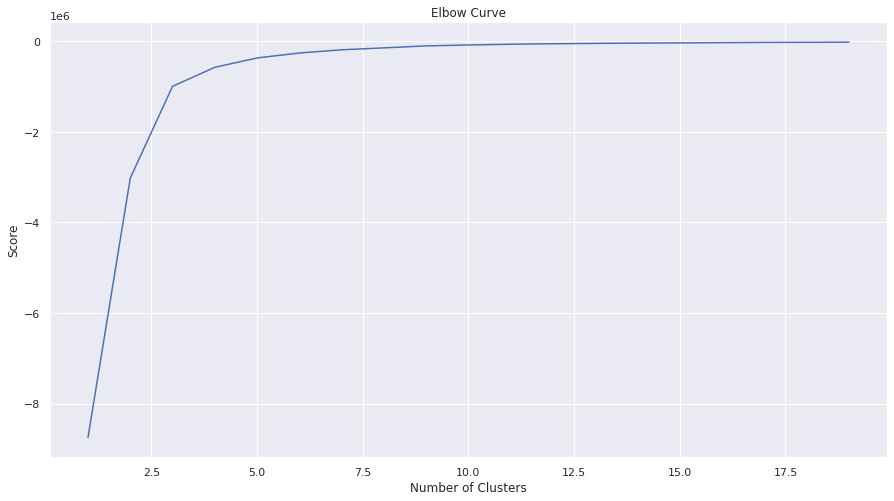

In [0]:
K_clusters = range(1,20)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = df[['Cured']]
X_axis = df[['Deaths']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

# Using Elbow method K has been turned out as 3 

In [0]:
kmeans = KMeans(n_clusters = 3, init ='k-means++')
kmeans.fit(X[X.columns[1:3]]) 
X['cluster_label'] = kmeans.fit_predict(X[X.columns[1:3]])
centers = kmeans.cluster_centers_ 
labels = kmeans.predict(X[X.columns[1:3]]) 

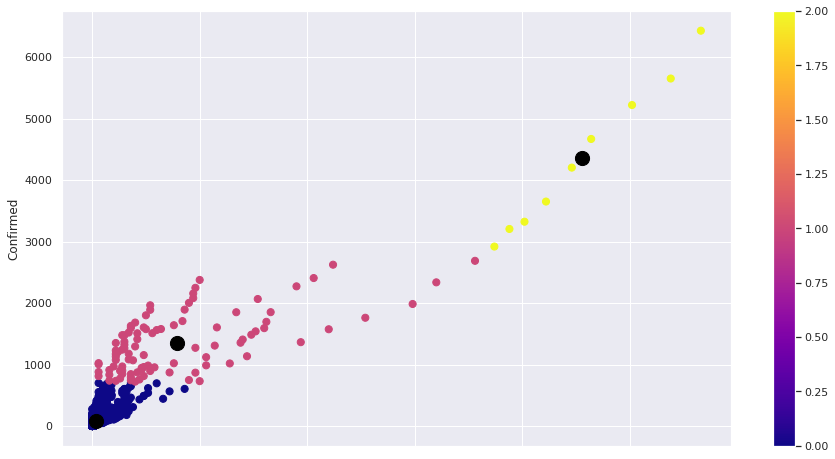

In [0]:
X.plot.scatter(x ='Deaths', y ='Confirmed', c=labels, s=50, cmap='plasma')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=1)


In [0]:
centers = kmeans.cluster_centers_
print(centers)

[[1.79254869e+00 7.48052498e+01]
 [3.95104167e+01 1.35487500e+03]
 [2.27888889e+02 4.36366667e+03]]


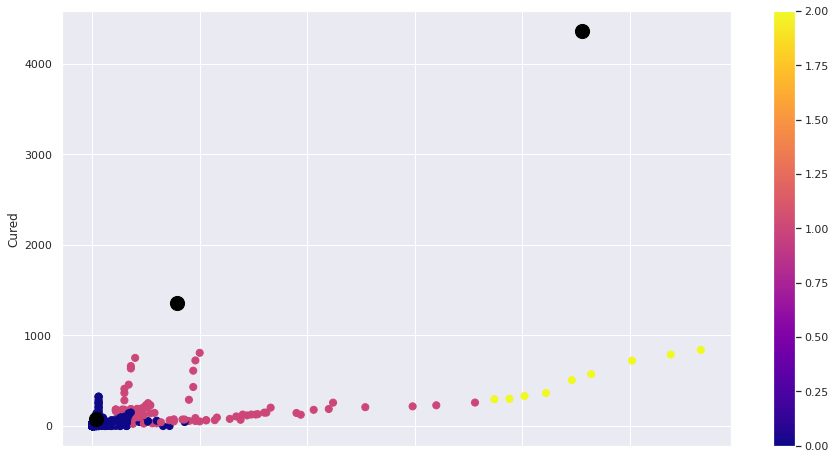

In [0]:
X.plot.scatter(x = 'Deaths', y = 'Cured', c=labels, s=50, cmap='plasma')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=1)